<a href="https://colab.research.google.com/github/TSffer/Topicos-IA/blob/master/Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def Leer_Datos(filename): 
    data = pd.read_csv(filename, sep=',', header=None).to_numpy()
    return data

def Normalizar_Datos(data):
    meam_data = data.mean(axis=0)
    std_data = data.std(axis=0)

    normalization_t = data - meam_data
    normalization_t = normalization_t / std_data
    return normalization_t

def Crear_Entrenamiento_Prueba():
    dataset = pd.read_csv('/content/drive/My Drive/RegresionLineal/petrol_consumption.csv', sep='\t').to_numpy()
    dataset = Normalizar_Datos(dataset)
    dataset = np.insert(dataset,0,values=1.0,axis=1)
    #print(dataset)
    sourcevars = dataset[:,:-1] 
    targetvar = dataset[:,len(dataset[0])-1] 

    x_train, x_test, y_train, y_test = train_test_split(sourcevars, targetvar, test_size=0.3, random_state=0)
    
    np.savetxt('/content/drive/My Drive/RegresionLineal/Dataset_Petrol/x_train.csv', x_train, delimiter=',')
    np.savetxt('/content/drive/My Drive/RegresionLineal/Dataset_Petrol/y_train.csv', y_train, delimiter=',')
    np.savetxt('/content/drive/My Drive/RegresionLineal/Dataset_Petrol/x_test.csv', x_test, delimiter=',')
    np.savetxt('/content/drive/My Drive/RegresionLineal/Dataset_Petrol/y_test.csv', y_test, delimiter=',')

#Crear_Entrenamiento_Prueba()

In [0]:
# Regresion usando la formula
def Ecuacion_Normal(x_, y_):
    th1 = np.linalg.inv(np.dot(x_.T,x_))
    th2 = np.dot(x_.T,y_)
    theta = np.dot(th1, th2)
    return theta

In [0]:
# Regresion usando gradiente descendiente
def f_costo(theta_, x, y):
    m_ = x.shape[0]
    h_t = np.dot(x,theta_)
    cost = (1/(2*m_)) * np.square(h_t - y).sum(axis=0)
    return cost


In [0]:
def gradiente_descendiente(x, y, alpha, theta_, it):
    cost_h = np.zeros(it)
    m = x.shape[0]
    for i in range(it):
        h_theta = np.dot(x,theta_)
        theta_ = theta_ - alpha/m*(np.dot(x.T,(h_theta - y)))
        cost_h[i] = f_costo(theta_, x, y)
    return theta_, cost_h

In [44]:
# main

#Theta = np.matrix('0 ; 0')
"""Theta = np.zeros((2,1),float)
X = Leer_Datos("/content/drive/My Drive/RegresionLineal/Dataset/x_trainHome.csv")
Y = Leer_Datos("/content/drive/My Drive/RegresionLineal/Dataset/y_trainHome.csv")

theta_EN = Ecuacion_Normal(X, Y)
print(theta_EN)
theta_GD, cost_h, theta_h = gradiente_descendiente(X, Y, 0.01, Theta, 500)
print(theta_GD)
#print(cost_h)"""


'Theta = np.zeros((2,1),float)\nX = Leer_Datos("/content/drive/My Drive/RegresionLineal/Dataset/x_trainHome.csv")\nY = Leer_Datos("/content/drive/My Drive/RegresionLineal/Dataset/y_trainHome.csv")\n\ntheta_EN = Ecuacion_Normal(X, Y)\nprint(theta_EN)\ntheta_GD, cost_h, theta_h = gradiente_descendiente(X, Y, 0.01, Theta, 500)\nprint(theta_GD)\n#print(cost_h)'

In [45]:
#Experimento 1

def EXP1(filename):
    x_train = Leer_Datos(filename + "/x_train.csv")
    y_train = Leer_Datos(filename + "/y_train.csv")
    x_test = Leer_Datos(filename + "/x_test.csv")
    y_test = Leer_Datos(filename + "/y_test.csv")

    theta_ = Ecuacion_Normal(x_train, y_train)

    print("Conjunto de Entrenamiento: " + filename)
    print(f_costo(theta_, x_train, y_train))
    print("Conjunto de Prueba: " +  filename)
    print(f_costo(theta_, x_test, y_test))
    print('\n')

EXP1("/content/drive/My Drive/RegresionLineal/Dataset_Home")
EXP1("/content/drive/My Drive/RegresionLineal/Dataset_Ocean")
EXP1("/content/drive/My Drive/RegresionLineal/Dataset_Petrol")

Conjunto de Entrenamiento: /content/drive/My Drive/RegresionLineal/Dataset_Home
[0.11730855]
Conjunto de Prueba: /content/drive/My Drive/RegresionLineal/Dataset_Home
[0.17311598]


Conjunto de Entrenamiento: /content/drive/My Drive/RegresionLineal/Dataset_Ocean
[0.0801871]
Conjunto de Prueba: /content/drive/My Drive/RegresionLineal/Dataset_Ocean
[0.0691331]


Conjunto de Entrenamiento: /content/drive/My Drive/RegresionLineal/Dataset_Petrol
[0.17248454]
Conjunto de Prueba: /content/drive/My Drive/RegresionLineal/Dataset_Petrol
[0.14983344]




In [46]:
#Experimento 2

def EXP2(filename, ds):
    x_train = Leer_Datos(filename + "/x_train.csv")
    y_train = Leer_Datos(filename + "/y_train.csv")
    x_test = Leer_Datos(filename + "/x_test.csv")
    y_test = Leer_Datos(filename + "/y_test.csv")

    Theta = np.zeros((x_train.shape[1],1),float)
    theta_GD = np.zeros((x_train.shape[1],1),float)
    apr = np.array([0.01, 0.05, 0.1, 0.2, 0.3, 0.4])
    Error = np.zeros((7,6),float)
    s = 0

    for it in range(500,4000,500):
        for i in range(len(apr)):
            theta_GD, cost = gradiente_descendiente(x_train, y_train, apr[i], Theta, it)
            #print(apr[i],it)
            Error[s,i] = f_costo(theta_GD, x_test, y_test)
        s = s + 1
    print("Conjunto de Datos: " + ds)
    fils = ["iter: 500", "iter: 1000", "iter: 1500", "iter: 2000", "iter: 2500", "iter: 3000", "iter: 3500"]
    cols = ["α: 0.01", "α: 0.05", "α: 0.1", "α: 0.2", "α: 0.3", "α: 0.4"]
    df = pd.DataFrame(Error, columns=cols, index=fils)

    print(df)
    print('\n')

theta_GDH = EXP2("/content/drive/My Drive/RegresionLineal/Dataset_Home", "Precio Viviendas")
theta_GDO = EXP2("/content/drive/My Drive/RegresionLineal/Dataset_Ocean", "Temperatura Océano")
theta_GDP = EXP2("/content/drive/My Drive/RegresionLineal/Dataset_Petrol", "Consumo de Petróleo")

Conjunto de Datos: Precio Viviendas
             α: 0.01   α: 0.05    α: 0.1    α: 0.2    α: 0.3    α: 0.4
iter: 500   0.173466  0.173116  0.173116  0.173116  0.173116  0.173116
iter: 1000  0.173118  0.173116  0.173116  0.173116  0.173116  0.173116
iter: 1500  0.173116  0.173116  0.173116  0.173116  0.173116  0.173116
iter: 2000  0.173116  0.173116  0.173116  0.173116  0.173116  0.173116
iter: 2500  0.173116  0.173116  0.173116  0.173116  0.173116  0.173116
iter: 3000  0.173116  0.173116  0.173116  0.173116  0.173116  0.173116
iter: 3500  0.173116  0.173116  0.173116  0.173116  0.173116  0.173116


Conjunto de Datos: Temperatura Océano
             α: 0.01   α: 0.05    α: 0.1    α: 0.2    α: 0.3    α: 0.4
iter: 500   0.069683  0.069133  0.069133  0.069133  0.069133  0.069133
iter: 1000  0.069137  0.069133  0.069133  0.069133  0.069133  0.069133
iter: 1500  0.069133  0.069133  0.069133  0.069133  0.069133  0.069133
iter: 2000  0.069133  0.069133  0.069133  0.069133  0.069133  0.069133
i

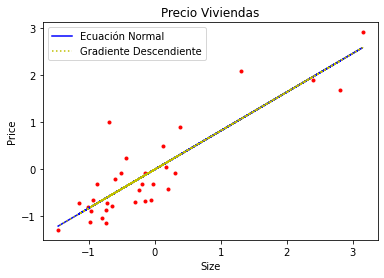

In [47]:
#Experimento 3
def EXP3(filename):
    x_train = Leer_Datos(filename + "/x_train.csv")
    y_train = Leer_Datos(filename + "/y_train.csv")
    x_test = Leer_Datos(filename + "/x_test.csv")
    y_test = Leer_Datos(filename + "/y_test.csv")

    Theta = np.zeros((x_train.shape[1],1),float)

    theta_EN = Ecuacion_Normal(x_train, y_train)
    theta_GD, cost = gradiente_descendiente(x_train, y_train, 0.4, Theta, 500)

    y_p_ec = np.dot(x_train, theta_EN)
    y_p_gd = np.dot(x_train, theta_GD)

    plt.plot(x_train[:,1],y_train[:,0],'r.')
    plt.plot(x_train[:,1],y_p_ec[:,0], 'b',label='Ecuación Normal')
    plt.plot(x_train[:,1],y_p_gd[:,0], ':y',label='Gradiente Descendiente')
    plt.title('Precio Viviendas')
    plt.xlabel('Size')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

EXP3("/content/drive/My Drive/RegresionLineal/Dataset_Home")

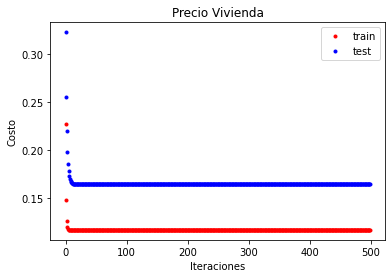

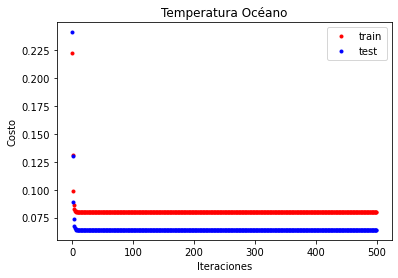

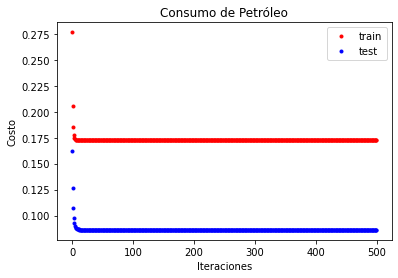

In [48]:
#Experimento 4
def EXP4(filename, bs):
    x_train = Leer_Datos(filename + "/x_train.csv")
    y_train = Leer_Datos(filename + "/y_train.csv")
    x_test = Leer_Datos(filename + "/x_test.csv")
    y_test = Leer_Datos(filename + "/y_test.csv")

    Theta = np.zeros((x_train.shape[1],1),float)
    theta_GD1, cost_tr = gradiente_descendiente(x_train, y_train, 0.4, Theta, 500)
    theta_GD2, cost_te = gradiente_descendiente(x_test, y_test, 0.4, Theta, 500)

    

    plt.plot(np.arange(cost_tr.shape[0]),cost_tr,'r.', label='train')
    plt.plot(np.arange(cost_te.shape[0]),cost_te,'b.', label='test')
    plt.title(bs)
    plt.xlabel('Iteraciones')
    plt.ylabel('Costo')
    plt.legend()
    plt.show()
    

EXP4("/content/drive/My Drive/RegresionLineal/Dataset_Home", "Precio Vivienda")
EXP4("/content/drive/My Drive/RegresionLineal/Dataset_Ocean", "Temperatura Océano")
EXP4("/content/drive/My Drive/RegresionLineal/Dataset_Petrol", "Consumo de Petróleo")